# 1. EDA 

## 1.1 Import neccessary packages and configs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Config seaborn 
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 1.2 Download the data

In [2]:
try:
    sales = pd.read_csv("../archive/SalesForCourse_quizz_table.csv")
except FileNotFoundError:
    print("File not found. Please make sure the CSV file is in the correct directory.")

## 1.3 Overview of the data

In [3]:
print("----- First 5 rows -----")
display(sales.head())

print("\n----- Data Info -----")
sales.info()

print("\n----- Descriptive Statistics -----")
display(sales.describe())

----- First 5 rows -----


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN



----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), in

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


## 1.4 Histograms

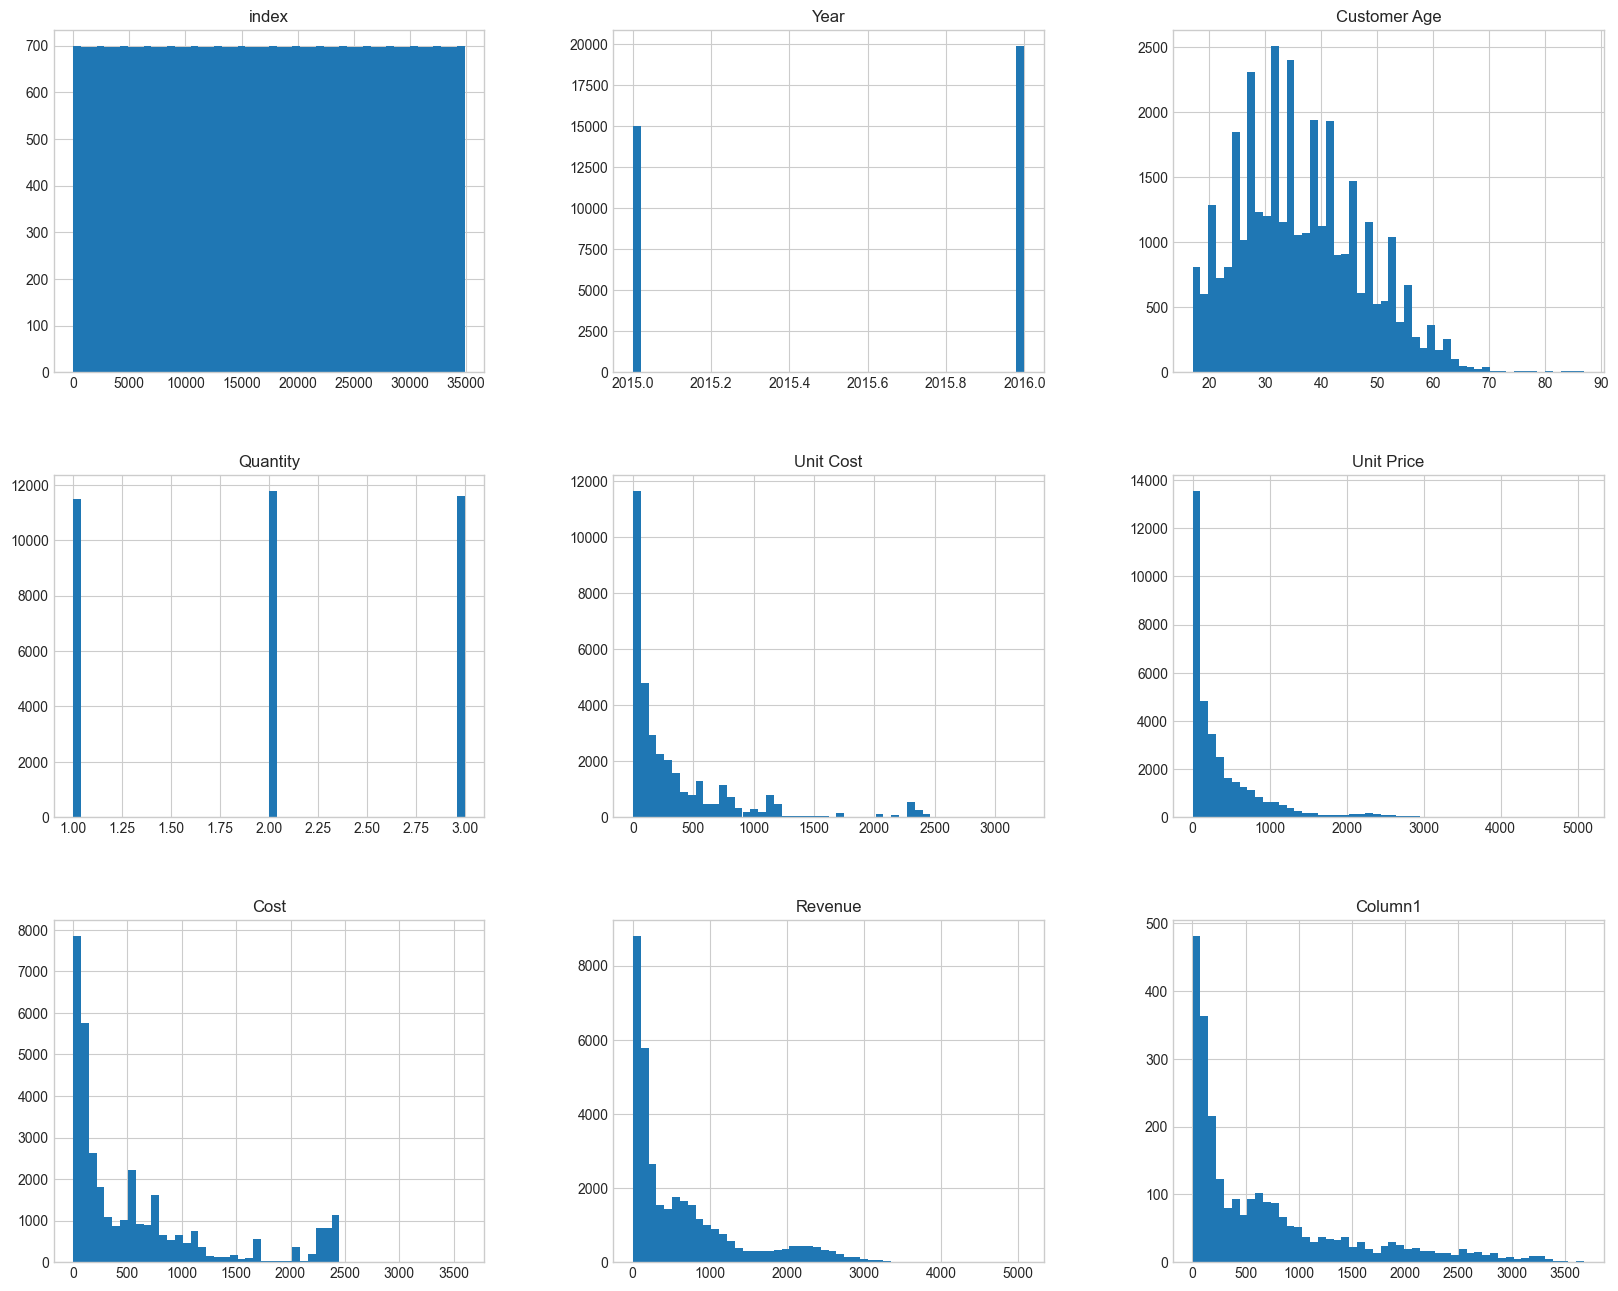

In [4]:
sales.hist(bins=50, figsize=(20, 16))
plt.show()

# 2. Stratified Split

In [5]:
sales['Revenue_cat'] = pd.cut(sales['Revenue'], bins=[0., 200., 700., 1500., np.inf], labels=[1, 2, 3, 4])

strat_train_set, strat_test_set = train_test_split(
    sales, 
    test_size=0.2, 
    stratify=sales["Revenue_cat"], 
    random_state=42
)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("Revenue_cat", axis=1, inplace=True)

print("Training set size:", len(strat_train_set))
print("Test set size:", len(strat_test_set))

Training set size: 27893
Test set size: 6974


# 3. Explore and visualize the data to gain insights on the train test

## 3.1 Feature engineering and correlation analysis

In [6]:
sales_exp = strat_train_set.copy()

sales_exp['Profit'] = sales_exp['Revenue'] - sales_exp['Cost'] # Add column 'Profit'

# Correlation analysis with the 'Revenue' column
corr_matrix = sales_exp.select_dtypes(include=np.number).corr()
print("Correlation with Revenue:")
print(corr_matrix["Revenue"].sort_values(ascending=False))

Correlation with Revenue:
Revenue         1.000000
Cost            0.979029
Unit Price      0.851136
Unit Cost       0.836821
Profit          0.395881
Customer Age    0.024201
Column1         0.009043
Quantity        0.006528
Year           -0.024839
index          -0.083390
Name: Revenue, dtype: float64


## 3.2 Visualize the relationship with scatterplots and boxplots

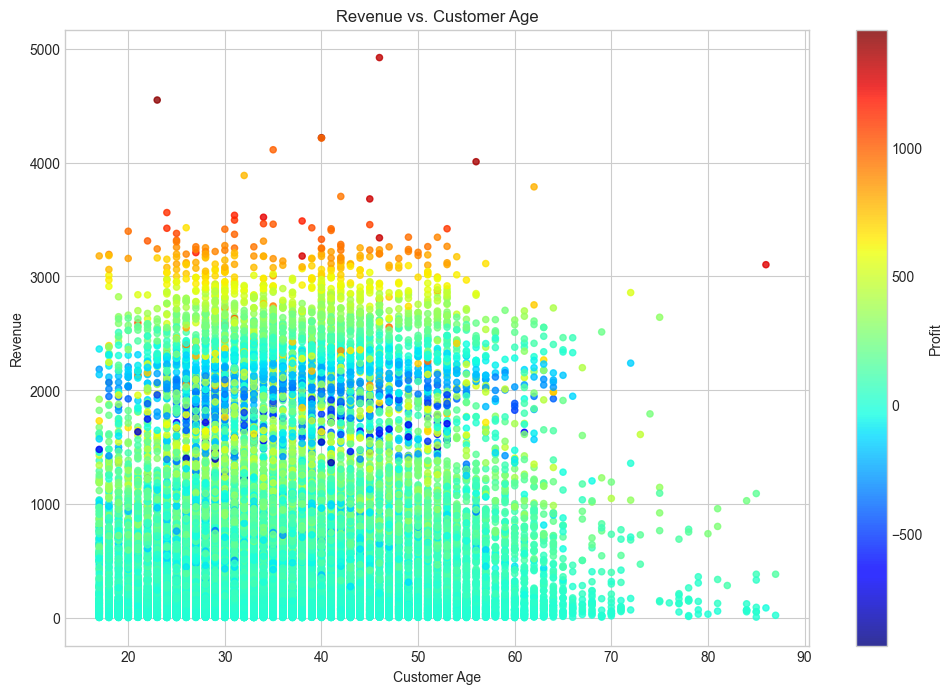

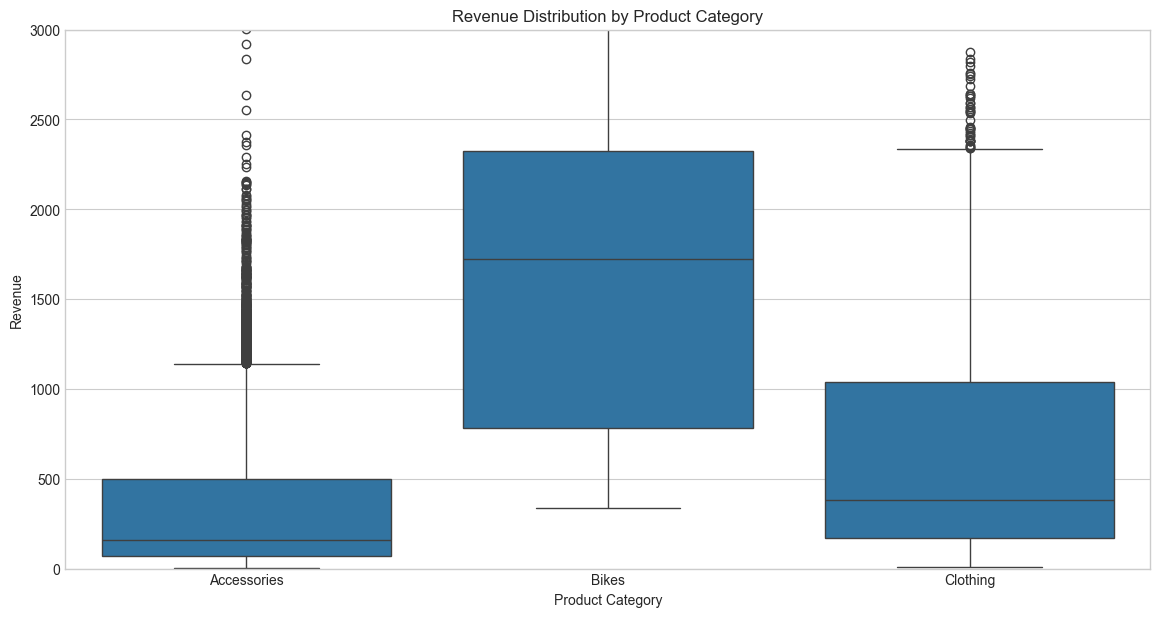

In [7]:
# Scatter plot: Revenue vs Cusomter Age.
sales_exp.plot(
    kind="scatter",
    x="Customer Age",
    y="Revenue",
    alpha=0.8,
    figsize=(12, 8),
    c="Profit",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    title="Revenue vs. Customer Age",
)
plt.show()

# Box plot: Revenue theo Product Category
plt.figure(figsize=(14, 7))
sns.boxplot(x="Product Category", y="Revenue", data=sales_exp)
plt.title("Revenue Distribution by Product Category")
plt.ylim(0, 3000)
plt.show()

# 4. Preprocessing pipeline

In [ ]:
def prepare_data(df):
    """A function to perform cleaning and feature engineering."""
    # Drop useless columns
    df_clean = df.drop(columns=["index", "Column1"], errors="ignore")

    # Handle missing rows
    df_clean.dropna(subset=["Date", "Customer Age"], inplace=True)

    # Correct data types
    int_cols = ["Year", "Customer Age", "Quantity"]
    for col in int_cols:
        df_clean[col] = df_clean[col].astype(int)

    # Feature Engineering
    df_clean["Profit"] = df_clean["Revenue"] - df_clean["Cost"]
    age_bins = [0, 17, 25, 35, 50, 120]
    age_labels = ["Child", "Youth", "Young Adult", "Adult", "Senior"]
    df_clean["Age_Group"] = pd.cut(
        df_clean["Customer Age"], bins=age_bins, labels=age_labels, right=False
    )

    return df_clean


train_prepared_df = prepare_data(strat_train_set)
test_prepared_df = prepare_data(strat_test_set)

# Define target (y) and features (X) from the dataframes
y_train = (
    train_prepared_df["Profit"] > train_prepared_df["Profit"].quantile(0.85)
).astype(int)
X_train = train_prepared_df.drop(columns=["Revenue", "Cost", "Profit"])

y_test = (
    test_prepared_df["Profit"] > train_prepared_df["Profit"].quantile(0.85)
).astype(int)
X_test = test_prepared_df.drop(columns=["Revenue", "Cost", "Profit"])


# Define the final processing pipeline (for scaling and encoding)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
# not scale 'Customer Age'
numerical_features.remove("Customer Age")

categorical_features = [
    "Month",
    "Customer Gender",
    "Country",
    "Product Category",
    "Sub Category",
    "Age_Group",
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ],
    remainder="drop",
)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


print("Preprocessing complete!")
print(f"Shape of X_train_prepared: {X_train_prepared.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test_prepared: {X_test_prepared.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nData is now ready for modeling (Clustering and Classification).")

Preprocessing complete!
Shape of X_train_prepared: (27893, 46)
Shape of y_train: (27893,)
Shape of X_test_prepared: (6973, 46)
Shape of y_test: (6973,)

Data is now ready for modeling (Clustering and Classification).


# 5. Train the models

## 5.1 Clustering (k-means)

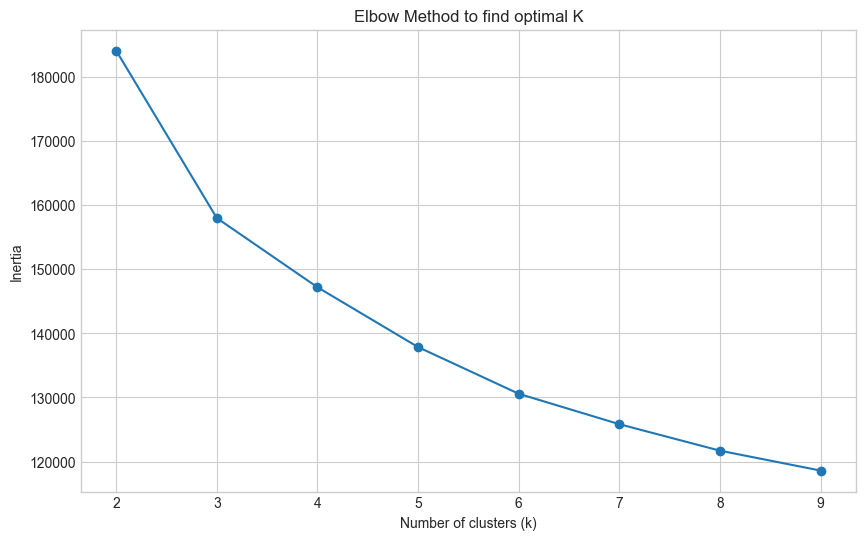

In [9]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_prepared)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to find optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_prepared)

unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

{np.int32(0): np.int64(3205), np.int32(1): np.int64(14270), np.int32(2): np.int64(10418)}


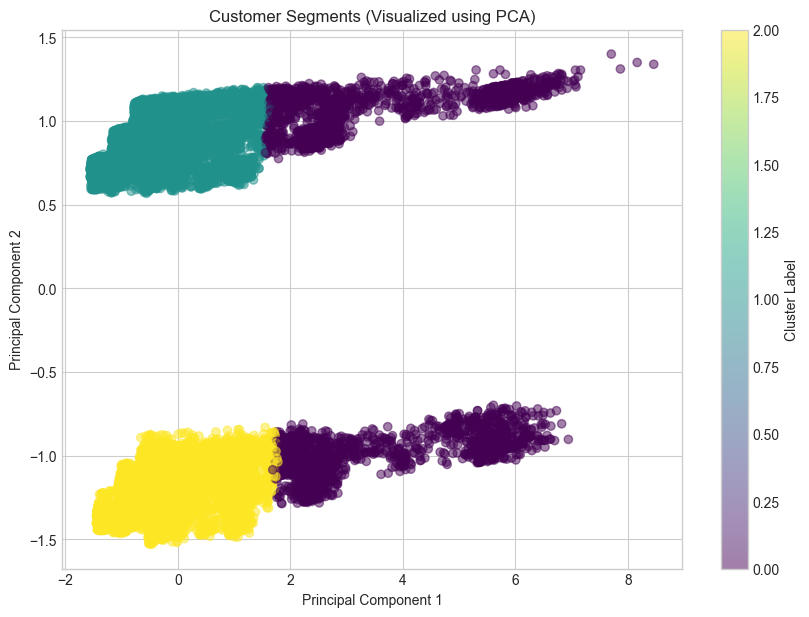

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_prepared)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Segments (Visualized using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
train_df_with_clusters = strat_train_set.copy()
train_df_with_clusters['Profit'] = train_df_with_clusters['Revenue'] - train_df_with_clusters['Cost']
train_df_with_clusters['Cluster'] = clusters

# Analyze the average numerical values for each cluster
numeric_profile = train_df_with_clusters.groupby('Cluster')[['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Profit']].mean()
print("----- Numerical Profile of Clusters -----")
display(numeric_profile)

# Analyze the categorical feature distribution for each cluster
print("\n----- Categorical Profile of Clusters -----")
for col in ['Product Category', 'Country', 'Customer Gender']:
    print(f"\n--- Distribution of {col} by Cluster ---")
    
    crosstab_df = pd.crosstab(train_df_with_clusters['Cluster'], train_df_with_clusters[col], normalize='index')
    display((crosstab_df * 100).round(1).astype(str) + '%')

----- Numerical Profile of Clusters -----


,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
Cluster,,,,,,,
0,36.730421,1.309516,1457.021841,1564.597816,1805.845866,1930.720437,124.874571
1,36.725788,2.086685,193.955195,237.134057,386.535739,468.746111,82.210371
2,35.780284,2.105203,222.441877,235.955110,456.916299,480.145709,23.229411



----- Categorical Profile of Clusters -----

--- Distribution of Product Category by Cluster ---


Product Category,Accessories,Bikes,Clothing
Cluster,,,
0,13.2%,73.4%,13.4%
1,72.8%,11.2%,16.1%
2,69.4%,16.4%,14.2%



--- Distribution of Country by Cluster ---


Country,France,Germany,United Kingdom,United States
Cluster,,,,
0,15.9%,19.0%,20.2%,44.9%
1,15.0%,14.7%,17.6%,52.7%
2,14.4%,13.6%,19.1%,52.9%



--- Distribution of Customer Gender by Cluster ---


Customer Gender,F,M
Cluster,,
0,48.8%,51.2%
1,47.6%,52.4%
2,50.6%,49.4%


# 6. Classification

## 6.1 Classify with logistic and random forest

In [13]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_prepared, y_train)

forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
forest_clf.fit(X_train_prepared, y_train)

print("Models trained successfully.")

Models trained successfully.


## 6.2 Evaluate

In [14]:
models = {'Logistic Regression': log_reg, 'Random Forest': forest_clf}

for name, model in models.items():
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test_prepared)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.9780582245805248

Confusion Matrix:
 [[5920   34]
 [ 119  900]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5954
           1       0.96      0.88      0.92      1019

    accuracy                           0.98      6973
   macro avg       0.97      0.94      0.95      6973
weighted avg       0.98      0.98      0.98      6973


--- Random Forest ---
Accuracy: 0.9515273196615517

Confusion Matrix:
 [[5822  132]
 [ 206  813]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5954
           1       0.86      0.80      0.83      1019

    accuracy                           0.95      6973
   macro avg       0.91      0.89      0.90      6973
weighted avg       0.95      0.95      0.95      6973



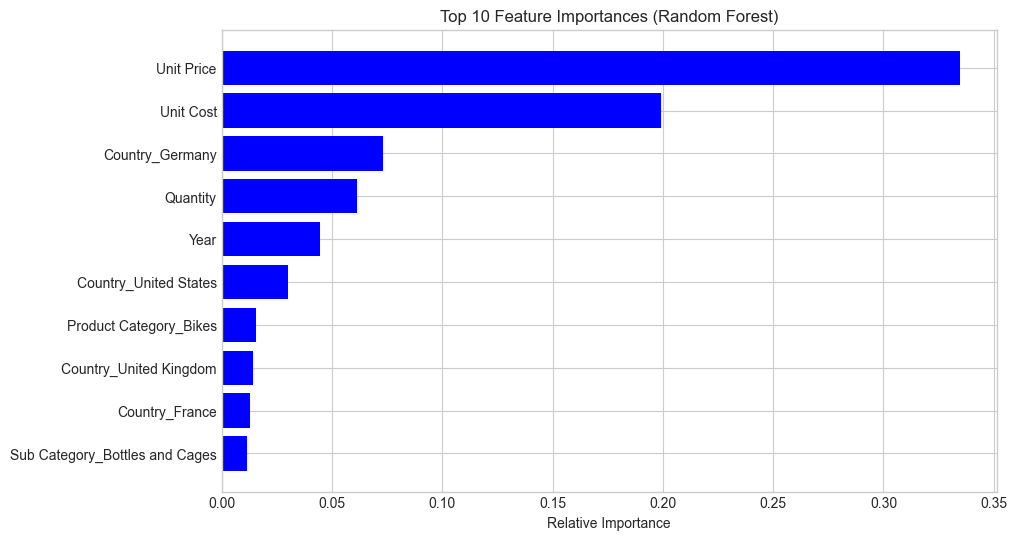

In [ ]:
feature_names = []

# Numerical names
feature_names.extend(numerical_features)

# Categorical names
cat_encoder = preprocessor.named_transformers_['cat']
feature_names.extend(cat_encoder.get_feature_names_out(categorical_features))

# Plot importance
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
# Save the preprocessor object
joblib.dump(preprocessor, 'preprocessor.joblib')

# Save the trained logistic regression model
joblib.dump(log_reg, 'model.joblib')

print("Preprocessor and Model saved successfully!")

Preprocessor and Model saved successfully!
